In [1]:
# Data from the Titanic
# Excerice for pivot tables
# numpy, pandas, and matplotlib

In [72]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
sns.set_style('whitegrid')
%matplotlib notebook

In [73]:
titanic = sns.load_dataset('titanic')

In [74]:
titanic.shape

(891, 15)

In [75]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [70]:
titanic.to_csv(r"/home/cambam/Desktop/titanic.csv")

In [76]:
df = titanic.groupby('sex')[['survived']].count()

<IPython.core.display.Javascript object>


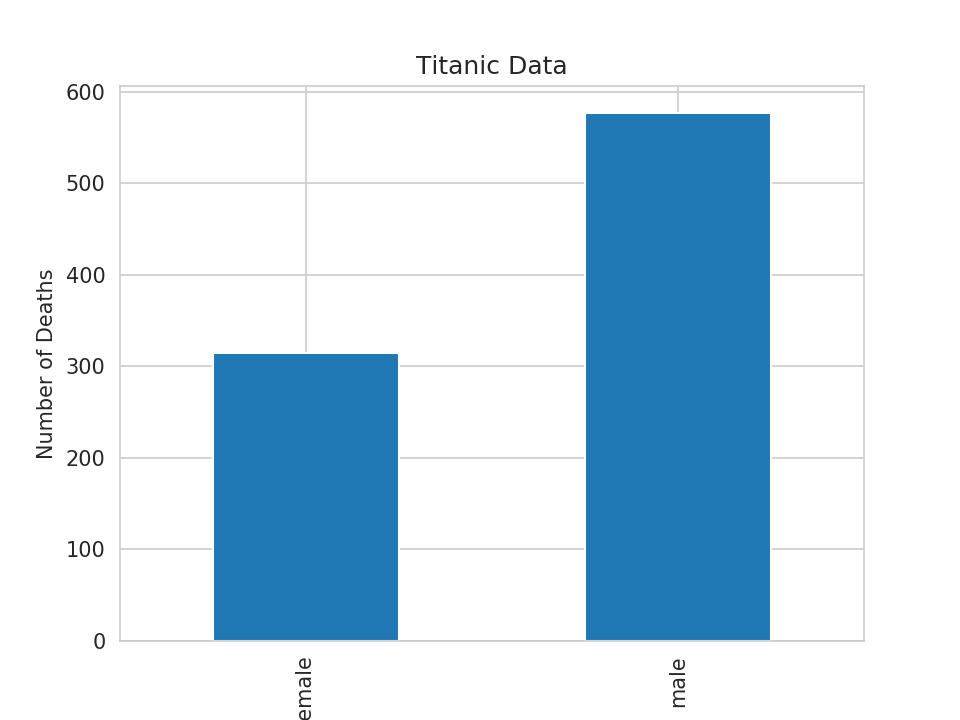

In [77]:
# Bar chart example

df.plot.bar()
plt.ylabel('Number of Deaths')
plt.title('Titanic Data')
plt.legend().remove()

<IPython.core.display.Javascript object>


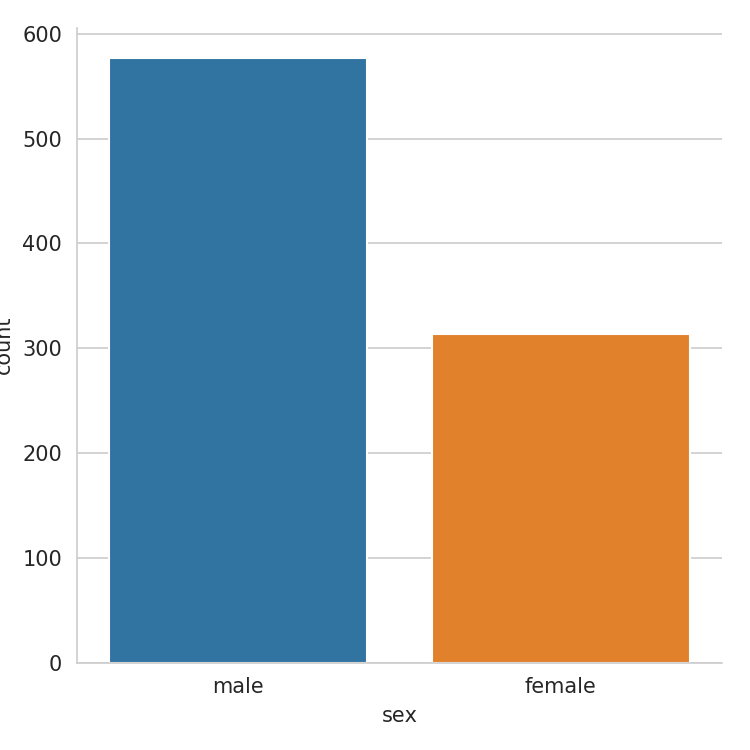

In [78]:
# A different way to see the same data

sns.factorplot('sex',data=titanic,kind='count')

In [79]:
# Creating a DataFrame to plot
result = pd.pivot_table(titanic, index='survived', 
                        columns='sex', 
                        values='pclass',
                        aggfunc=np.sum)

In [80]:
# confirming the DataFrame information is correct
# type(result)
result

sex,female,male
survived,,
0,231,1159
1,447,220


<IPython.core.display.Javascript object>


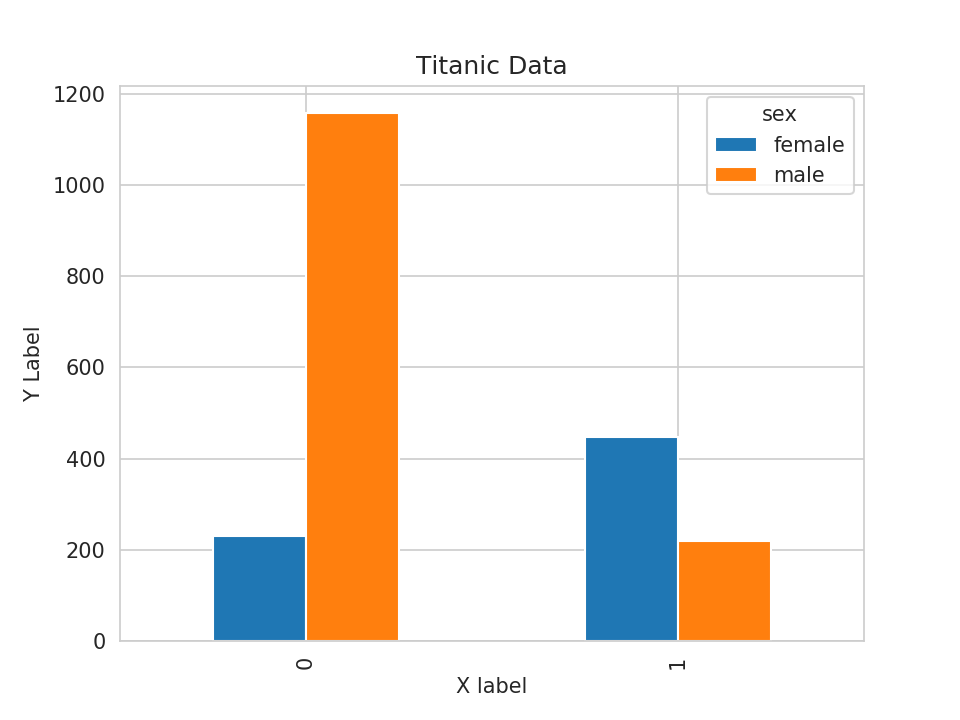

Text(0.5,1,'Titanic Data')

In [81]:
# Plotting the DataFrame 
result.plot.bar()
plt.ylabel('Y Label')
plt.xlabel('X label')
plt.title('Titanic Data')

<IPython.core.display.Javascript object>


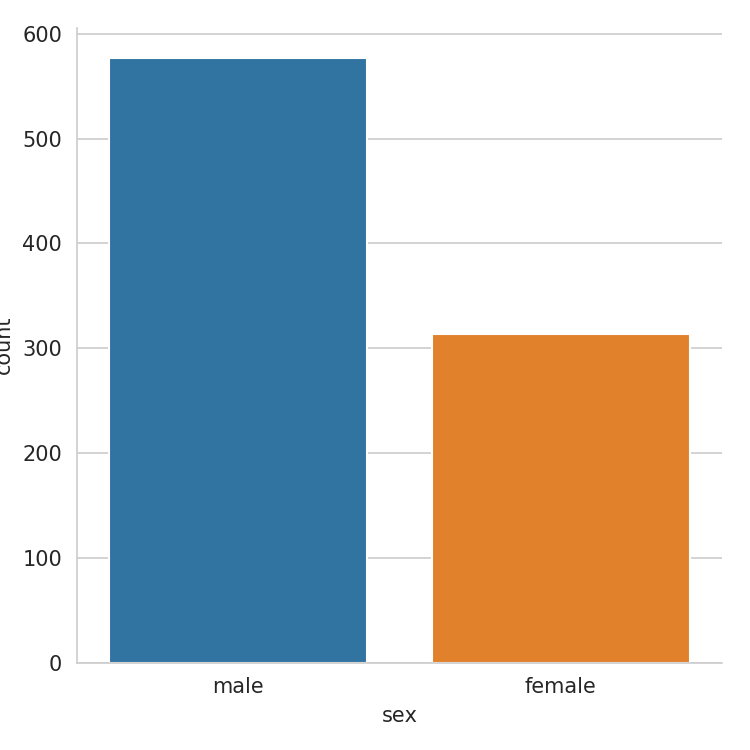

In [82]:
sns.factorplot('sex',data=titanic,kind='count')

<IPython.core.display.Javascript object>


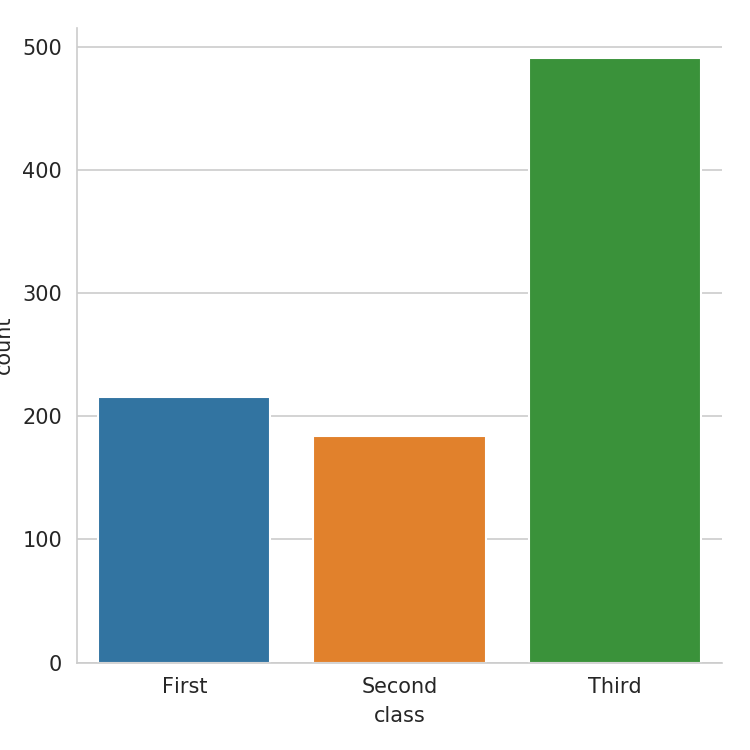

In [83]:
#Bar chart showing the number of passengers by class
sns.factorplot('class', data=titanic, kind='count')

In [99]:
# Creating a DataFrame to plot how many survived by class
result = pd.pivot_table(titanic, index='pclass', 
                        columns='sex', 
                        values='survived',
                        aggfunc=np.sum)

In [100]:
result

sex,female,male
pclass,,
1,91,45
2,70,17
3,72,47


<IPython.core.display.Javascript object>


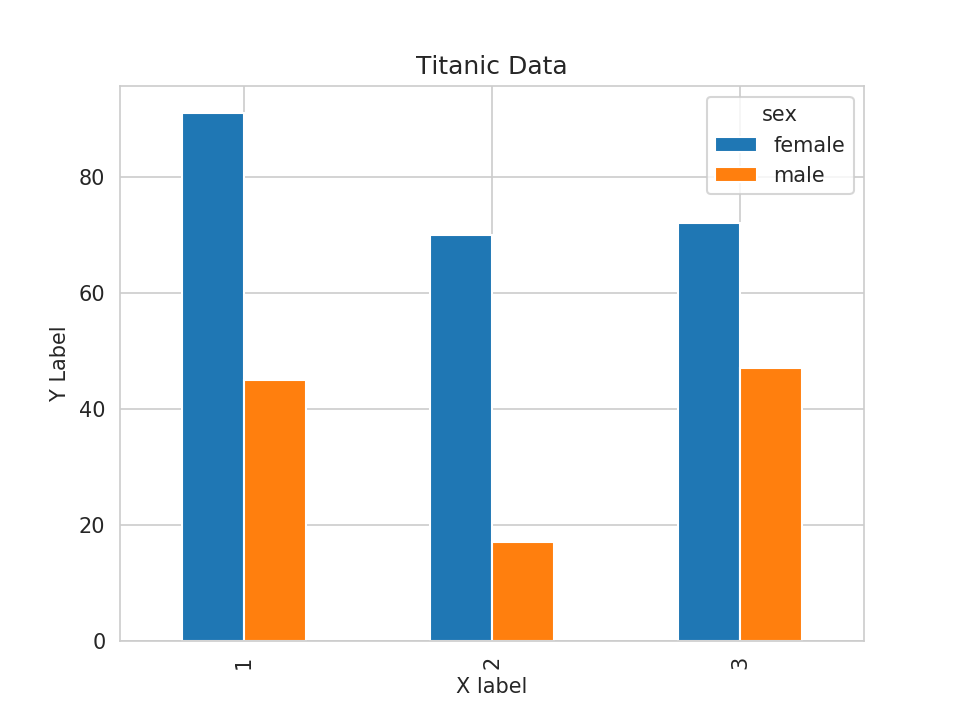

Text(0.5,1,'Titanic Data')

In [101]:
result.plot.bar()
plt.ylabel('Y Label')
plt.xlabel('X label')
plt.title('Titanic Data')